# AMLB shorter runs visualizations

In [31]:
import itertools
import math
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import seaborn

In [32]:
from data_processing import get_print_friendly_name, impute_missing_results, calculate_ranks, add_rescale, is_old
from visualization_early import FRAMEWORK_TO_COLOR

In [33]:
PROJECT_ROOT = Path(".").absolute().parent
DATA_DIRECTORY = PROJECT_ROOT / "data"
FIGURE_DIRECTORY = PROJECT_ROOT / "figures"

for subfolder in ["CD", "inference", "performance", "inference_by_time", "performance_by_time"]:
    (FIGURE_DIRECTORY / subfolder).mkdir(parents=True, exist_ok=True)

In [34]:
results = pd.read_csv(DATA_DIRECTORY / "amlb_all.csv", dtype={"info": str})
results["framework"] = results["framework"].apply(get_print_friendly_name)

# Scaled Results

In [35]:
# Define a function to replace the prefix
def replace_prefix(framework, prefix):
    if framework.startswith(prefix):
        return framework[len(prefix):]
    return framework

In [36]:
def add_horizontal_lines(ax, lines: tuple[tuple[float, str], ...]):
    """Draws horizontal lines specified by (y value, color)-pairs."""
    for y, color in lines:
        ax.axhline(y, color=color)


def box_plot(data, metric=None, ylog=False, title="", ylim=None, figsize=(16, 9), with_framework_names=True, add_counts=None, color_map=None):
    """Creates a boxplot with data["frameworks"] on the x-axis and data[`metric`] on the y-axis
    
    The figure's y-axis may be limited by `ylim` and the number of values outside this limit may be shown in the tick labels.
    """
    if add_counts and (add_counts != "outliers" and not isinstance(add_counts, dict)):
        raise ValueError("`add_counts` must be 'outliers' or a dictionary mapping each framework to a number.")
        
    color_map = color_map or FRAMEWORK_TO_COLOR
    # color_map = {k: v for k, v in color_map.items() if k in data["framework"].unique() or k=="autosklearn2"}
    color_map = {k: v for k, v in color_map.items() if k in data["framework"].unique()}
   
    metric = metric or data.metric.unique()[0]
    if metric.startswith("neg_"):
        pos_metric = metric[len("neg_"):]
        data[pos_metric], metric = -data[metric], pos_metric

    # print(data.framework.unique())
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    seaborn.boxplot(
        data=data,
        x="framework",
        y=metric,
        order=color_map,
        hue="constraint" if data.constraint.nunique() > 1 else None,
        palette=color_map if data.constraint.nunique() == 1 else None,
        ax=ax,
        fliersize=1,
    )
    
    if ylog:
        ax.set_yscale("log")
        
    ax.set_ylabel(metric, size='xx-large')
    ax.set_xlabel("", fontsize=8)
    ax.tick_params(axis='both', which = 'both', labelsize = 18)
    
    if title:
        ax.set_title(title, fontsize=18)
        
    # Dirty hack for displaying outliers, we overlap minor and major tick labels, where
    # minor labels are used to display the number of outliers, and major tick labels may
    # be used to display the framework names.
    constraint = data.constraint.unique()[0]
    smetric = data.metric.unique()[0]
    frameworks = color_map.keys()
    print("frameworks", frameworks)
    if add_counts:
        # There will be minor tick labels displayed for outliers,
        # to avoid rendering on top of each other, we offset the label location
        # with a dirty hack of using leading spaces :-) 
        frameworks = [f"   {fw}" for fw in frameworks]
    ax.tick_params(axis="x", which="major", rotation=-90)
    ax.set_xticks(*zip(*enumerate(frameworks)))
    
    if ylim:  
        ax.set_ylim(ylim)
        if add_counts != "outliers":
            print("Warning! Ylim is set but outliers are not reported.")
    
    counts = []
    if add_counts:
        if add_counts == "outliers":
            add_counts = {}
            for framework in color_map:
                framework_outliers = data[(data["framework"] == framework) & (data[metric] < ylim[0])]
                add_counts[framework] = f"{len(framework_outliers)}"

        # We need to offset the minor tick labels, otherwise they won't render.
        ax.set_xticks(
            ticks=[i-0.01 for i in range(len(color_map))],
            labels=[f"[{add_counts.get(f, 'x')}]" for f in color_map], 
            minor=True
        )
        
    return fig, ax

In [37]:
strings_in_frameworks = ['AutoGluon(B)', 'AutoGluon(HQ)', 'AutoGluon(HQIL)', 'flaml', 'TPOT', 'lightautoml',
       'MLJAR(B)', 'GAMA(B)', 'H2OAutoML', 'NaiveAutoML', 'FEDOT', 'autosklearn', 'autosklearn2',] # Add  'AutoGluon_FI_FT_IL' later for early stopping

In [38]:
name_mapping = {
    'constantpredictor_60min': 'CP_60min',
    'TunedRandomForest_60min': 'TRF_60min'
}

name:  AutoGluon(B)


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\2152049379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


generating box-rescaled-AutoGluon(B).pdf
frameworks dict_keys(['5min', '10min', '30min', '60min', 'TRF'])


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\1221873700.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seaborn.boxplot(


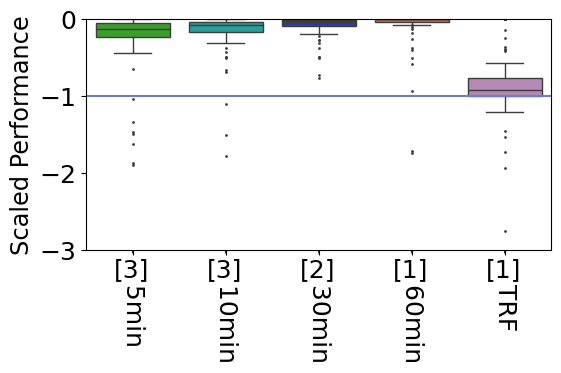

name:  AutoGluon(HQ)


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\2152049379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


generating box-rescaled-AutoGluon(HQ).pdf
frameworks dict_keys(['5min', '10min', '30min', '60min', 'TRF'])


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\1221873700.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seaborn.boxplot(


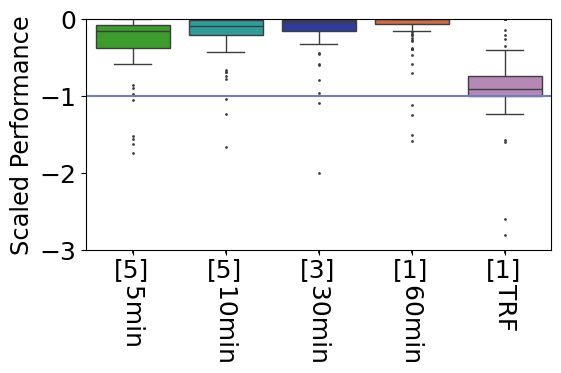

name:  AutoGluon(HQIL)


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\2152049379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


generating box-rescaled-AutoGluon(HQIL).pdf
frameworks dict_keys(['5min', '10min', '30min', '60min', 'TRF'])


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\1221873700.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seaborn.boxplot(


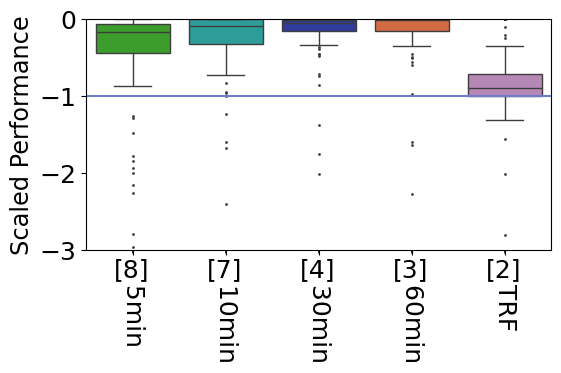

name:  flaml


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\2152049379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


generating box-rescaled-flaml.pdf
frameworks dict_keys(['5min', '10min', '30min', '60min', 'TRF'])


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\1221873700.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seaborn.boxplot(


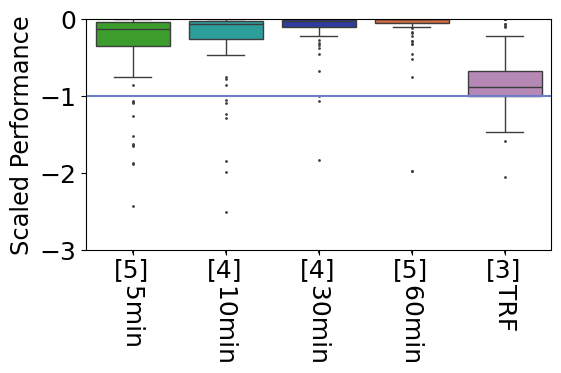

name:  TPOT


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\2152049379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


generating box-rescaled-TPOT.pdf
frameworks dict_keys(['5min', '10min', '30min', '60min', 'TRF'])


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\1221873700.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seaborn.boxplot(


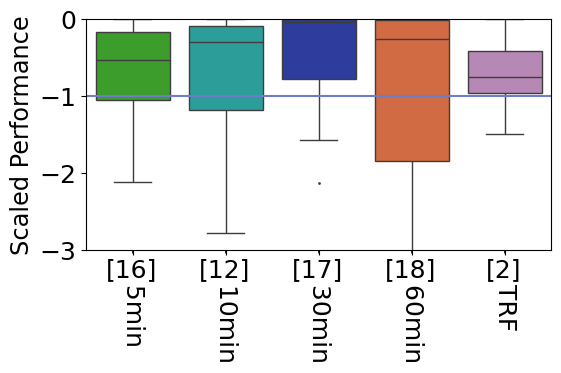

name:  lightautoml


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\2152049379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


generating box-rescaled-lightautoml.pdf
frameworks dict_keys(['5min', '10min', '30min', '60min', 'TRF'])


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\1221873700.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seaborn.boxplot(


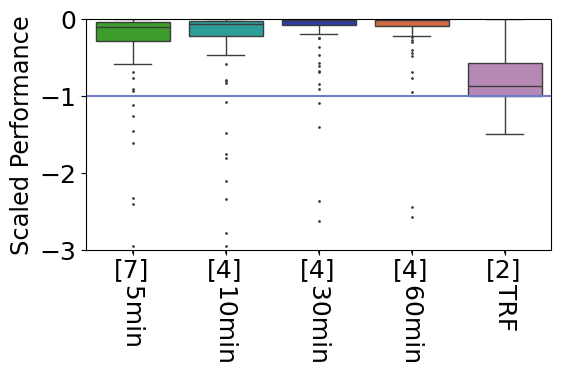

name:  MLJAR(B)


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\2152049379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


generating box-rescaled-MLJAR(B).pdf
frameworks dict_keys(['5min', '10min', '30min', '60min', 'TRF'])


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\1221873700.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seaborn.boxplot(


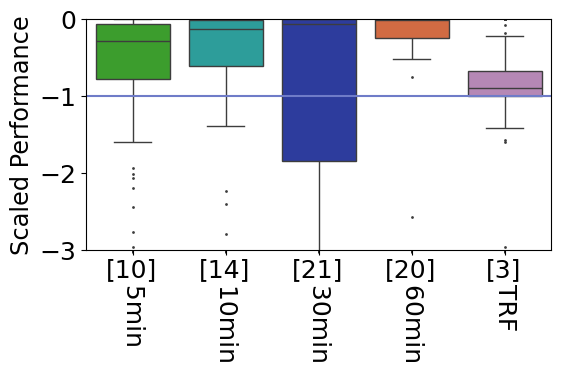

name:  GAMA(B)


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\2152049379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


generating box-rescaled-GAMA(B).pdf
frameworks dict_keys(['5min', '10min', '30min', '60min', 'TRF'])


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\1221873700.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seaborn.boxplot(


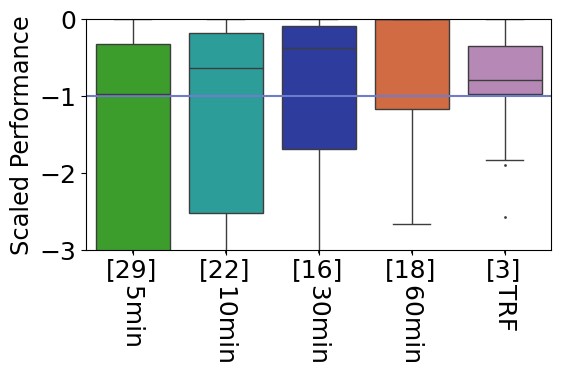

name:  H2OAutoML


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\2152049379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


generating box-rescaled-H2OAutoML.pdf


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\1221873700.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seaborn.boxplot(


frameworks dict_keys(['5min', '10min', '30min', '60min', 'TRF'])


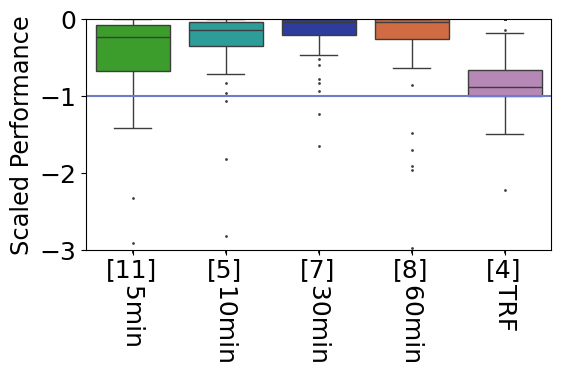

name:  NaiveAutoML


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\2152049379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


generating box-rescaled-NaiveAutoML.pdf
frameworks dict_keys(['5min', '10min', '30min', '60min', 'TRF'])


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\1221873700.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seaborn.boxplot(


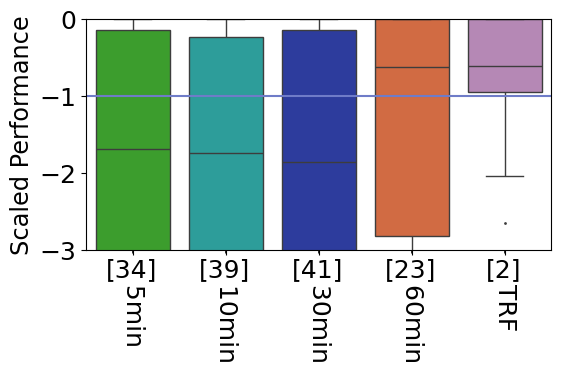

name:  FEDOT


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\2152049379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


generating box-rescaled-FEDOT.pdf
frameworks dict_keys(['5min', '10min', '30min', '60min', 'TRF'])


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\1221873700.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seaborn.boxplot(


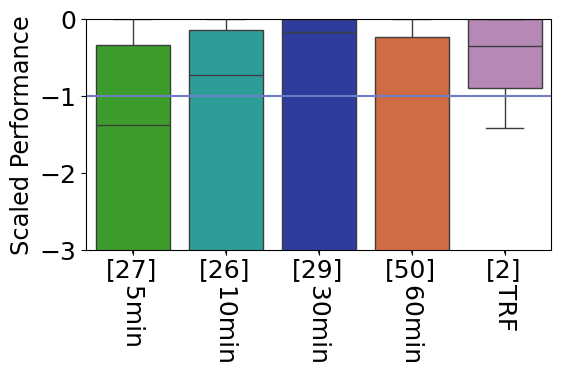

name:  autosklearn


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\2152049379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


generating box-rescaled-autosklearn.pdf
frameworks dict_keys(['5min', '10min', '30min', '60min', 'TRF'])


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\1221873700.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seaborn.boxplot(


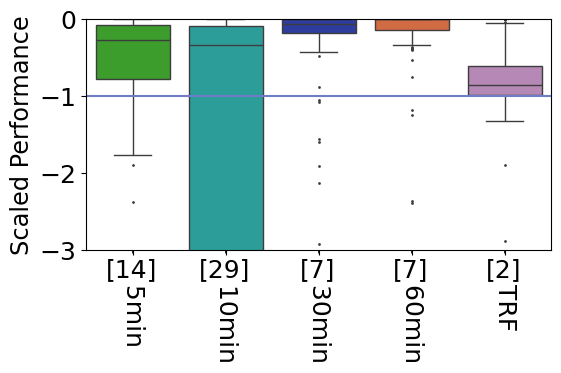

name:  autosklearn2


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\2152049379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


generating box-rescaled-autosklearn2.pdf
frameworks dict_keys(['5min', '10min', '30min', '60min', 'TRF'])


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\1221873700.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seaborn.boxplot(


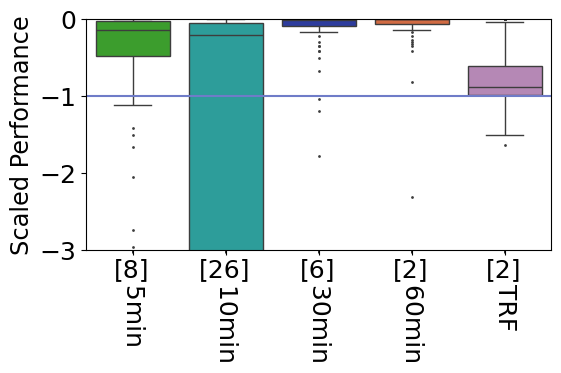

In [40]:
from matplotlib.backends.backend_pdf import PdfPages

for name_fr in strings_in_frameworks:
    print('name: ', name_fr)
    this_framework = results[results['framework'].isin([f'{name_fr}_5min', f'{name_fr}_10min', f'{name_fr}_30min', f'{name_fr}_60min', 'RF_60min', 'TRF_60min', 'CP_60min'])]
    this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))
    data = this_framework
    data = impute_missing_results(data, with_results_from="CP_60min")
    exclude = ['CP_60min']
    data = data[~data["framework"].isin(exclude)]
    data = data[["framework", "task", "constraint", "metric", "result"]].groupby(["framework", "task", "constraint", "metric"], as_index=False).mean()
    data = add_rescale(data, lower="RF_60min")
    data["scaled"] = -data["scaled"]
    data = data[data["framework"] != "RF_60min"]  # Not interesting as it is -1 by definition
    filename = f"box-rescaled-{name_fr}.pdf".replace(" ", "-")
    print("generating", filename)

    periwinkle_blue = "#6f7cc8"

    data['framework'] = data['framework'].str.replace('TRF_60min', 'TRF')
    data['framework'] = data['framework'].apply(lambda x: replace_prefix(x, f"{name_fr}_"))
    fig, ax = box_plot(
        data,
        metric="scaled", 
        ylim=[-3, 0],
        figsize=(6, 3),
        add_counts="outliers"
    )
    ax.set_ylabel("Scaled Performance")
    add_horizontal_lines(ax, ((-1, periwinkle_blue),))
    
    plt.show()
    with PdfPages(FIGURE_DIRECTORY / "performance" / filename) as f:
        f.savefig(fig, bbox_inches="tight")
    file_path = FIGURE_DIRECTORY / "performance" / f"{filename.replace('pdf', 'png')}"
    fig.savefig(file_path, bbox_inches="tight", dpi=1000)


### All frameworks by time

In [41]:
strings_by_time = ['_5min', '_10min', '_30min', '_60min']
extra_frameworks = ['RF_60min', 'TRF_60min', 'CP_60min']

C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\3060239894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


generating box-rescaled_5min.pdf
frameworks dict_keys(['AutoGluon(B)', 'AutoGluon(HQIL)', 'AutoGluon(HQ)', 'autosklearn2', 'autosklearn', 'FEDOT', 'flaml', 'GAMA(B)', 'H2OAutoML', 'lightautoml', 'MLJAR(B)', 'NaiveAutoML', 'TPOT', 'TRF'])


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\1221873700.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seaborn.boxplot(


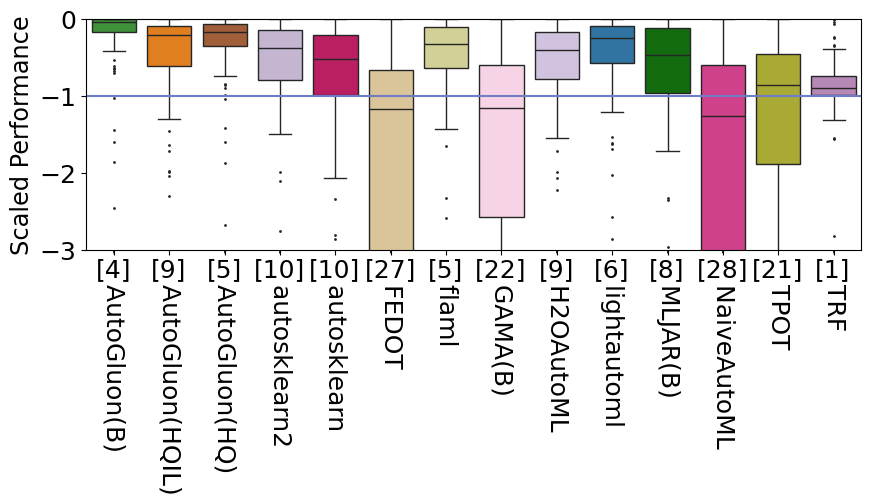

C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\3060239894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


generating box-rescaled_10min.pdf
frameworks dict_keys(['AutoGluon(B)', 'AutoGluon(HQIL)', 'AutoGluon(HQ)', 'autosklearn2', 'autosklearn', 'FEDOT', 'flaml', 'GAMA(B)', 'H2OAutoML', 'lightautoml', 'MLJAR(B)', 'NaiveAutoML', 'TPOT', 'TRF'])


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\1221873700.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seaborn.boxplot(


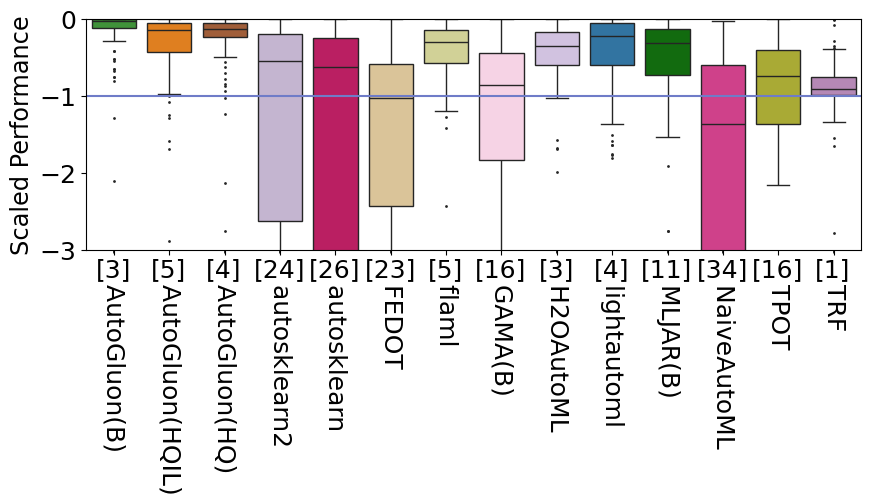

C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\3060239894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


generating box-rescaled_30min.pdf
frameworks dict_keys(['AutoGluon(B)', 'AutoGluon(HQIL)', 'AutoGluon(HQ)', 'autosklearn2', 'autosklearn', 'FEDOT', 'flaml', 'GAMA(B)', 'H2OAutoML', 'lightautoml', 'MLJAR(B)', 'NaiveAutoML', 'TPOT', 'TRF'])


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\1221873700.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seaborn.boxplot(


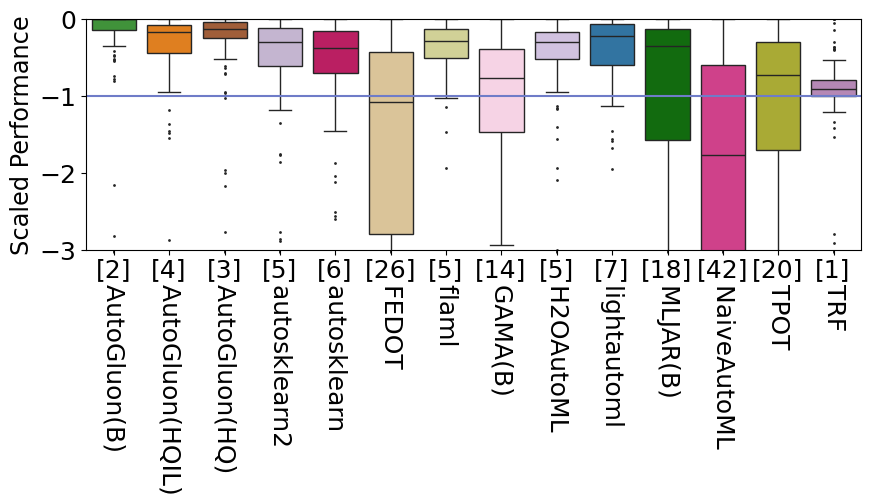

C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\3060239894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


generating box-rescaled_60min.pdf
frameworks dict_keys(['AutoGluon(B)', 'AutoGluon(HQIL)', 'AutoGluon(HQ)', 'autosklearn2', 'autosklearn', 'FEDOT', 'flaml', 'GAMA(B)', 'H2OAutoML', 'lightautoml', 'MLJAR(B)', 'NaiveAutoML', 'TPOT', 'TRF'])


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\1221873700.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seaborn.boxplot(


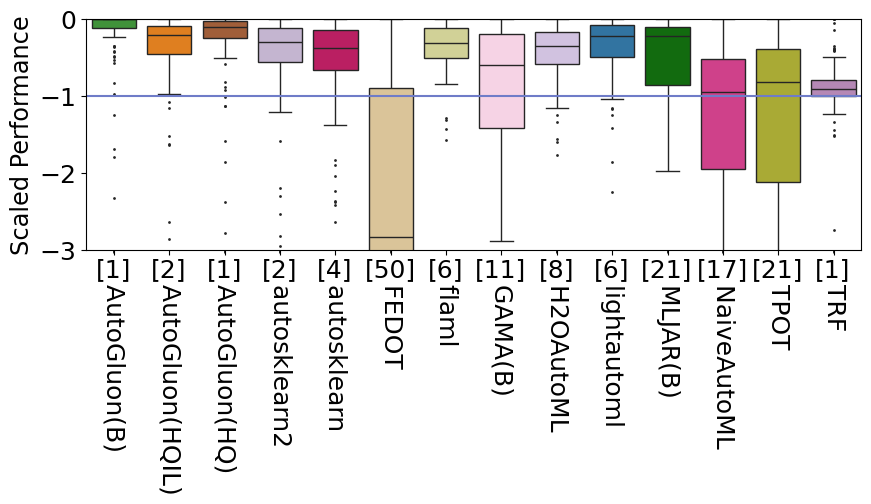

In [43]:
from matplotlib.backends.backend_pdf import PdfPages

for name_time in strings_by_time:
    this_framework = results[results['framework'].str.contains(name_time) | results['framework'].isin(extra_frameworks)]
    this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))
    data = this_framework
    data = impute_missing_results(data, with_results_from="CP_60min")

    exclude = ['CP_60min']
    data = data[~data["framework"].isin(exclude)]    

    data = data[["framework", "task", "constraint", "metric", "result"]].groupby(["framework", "task", "constraint", "metric"], as_index=False).mean()
    data = add_rescale(data, lower="RF_60min")
    data["scaled"] = -data["scaled"]
    data = data[data["framework"] != "RF_60min"]  # Not interesting as it is -1 by definition
    data['framework'] = data['framework'].str.replace(name_time, '')
    data['framework'] = data['framework'].str.replace('_60min', '') # This is for the baselines _60min
    filename = f"box-rescaled{name_time}.pdf".replace(" ", "-")
    print("generating", filename)
    
    periwinkle_blue = "#6f7cc8"
    fig, ax = box_plot(
        data,
        metric="scaled", 
        ylim=[-3, 0],
        figsize=(10, 3),
        add_counts="outliers"
    )
    ax.set_ylabel("Scaled Performance")
    add_horizontal_lines(ax, ((-1, periwinkle_blue),))
    
    plt.show()
    with PdfPages(FIGURE_DIRECTORY / "performance_by_time" / filename) as f:
        f.savefig(fig, bbox_inches="tight")

    # Define the file path for the PNG file
    file_path = FIGURE_DIRECTORY / "performance_by_time" / f"{filename.replace('pdf', 'png')}"
    # Save the figure as a PNG file
    fig.savefig(file_path, bbox_inches="tight", dpi=1000)


# Inference vs Performance

mean rescaled result vs median inference speed row/s at 10k and at 1

In [44]:
def calculate_pareto(xs, ys) -> list[tuple[float, float]]:
    pairs = list(zip(xs, ys))
    return [
        (x, y)
        for x, y in pairs
        if not any((x2>=x and y2 >=y) and (x!=x2 or y!=y2) for x2, y2 in pairs)
    ]

def plot_pareto(data, x, y, ax, color="#cccccc"):
    pareto = sorted(calculate_pareto(data[x], data[y]))
    for opt, next_opt in zip(pareto, pareto[1:]):
        ax.plot([opt[0], opt[0], next_opt[0]], [opt[1],next_opt[1], next_opt[1]], color=color, zorder=0)
        

### All frameworks by time

In [45]:
name_mapping = {
    'constantpredictor_60min': 'CP_60min',
    'RandomForest_60min': 'RF_60min',
    'TunedRandomForest_60min': 'TRF_60min'
}

In [46]:
this_framework.framework.unique()
list_order = list(FRAMEWORK_TO_COLOR.keys())

In [47]:
strings_by_time = ['_5min', '_10min', '_30min', '_60min']
extra_frameworks = ['RF_60min', 'TRF_60min', 'CP_60min']

this frameworks ['AutoGluon(HQIL)_5min' 'AutoGluon(HQ)_5min' 'AutoGluon(B)_5min'
 'FEDOT_5min' 'GAMA(B)_5min' 'H2OAutoML_5min' 'NaiveAutoML_5min'
 'RF_60min' 'TPOT_5min' 'TRF_60min' 'autosklearn2_5min' 'autosklearn_5min'
 'CP_60min' 'flaml_5min' 'lightautoml_5min' 'MLJAR(B)_5min']


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\2041578537.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


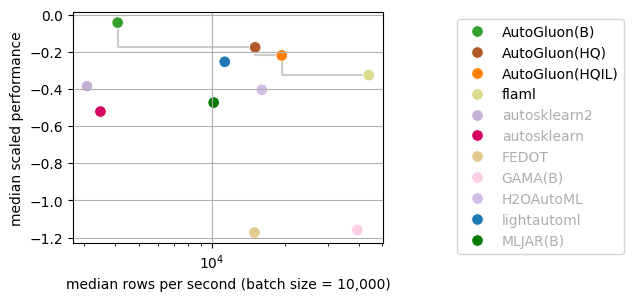

this frameworks ['AutoGluon(HQIL)_10min' 'AutoGluon(HQ)_10min' 'AutoGluon(B)_10min'
 'FEDOT_10min' 'GAMA(B)_10min' 'H2OAutoML_10min' 'NaiveAutoML_10min'
 'RF_60min' 'TPOT_10min' 'TRF_60min' 'autosklearn2_10min'
 'autosklearn_10min' 'CP_60min' 'flaml_10min' 'lightautoml_10min'
 'MLJAR(B)_10min']


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\2041578537.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


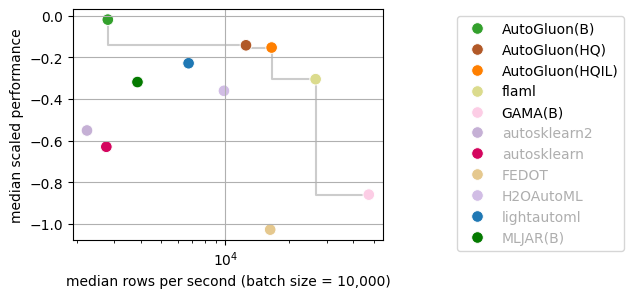

this frameworks ['AutoGluon(HQIL)_30min' 'AutoGluon(HQ)_30min' 'AutoGluon(B)_30min'
 'FEDOT_30min' 'GAMA(B)_30min' 'H2OAutoML_30min' 'NaiveAutoML_30min'
 'RF_60min' 'TPOT_30min' 'TRF_60min' 'autosklearn2_30min'
 'autosklearn_30min' 'CP_60min' 'flaml_30min' 'lightautoml_30min'
 'MLJAR(B)_30min']


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\2041578537.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


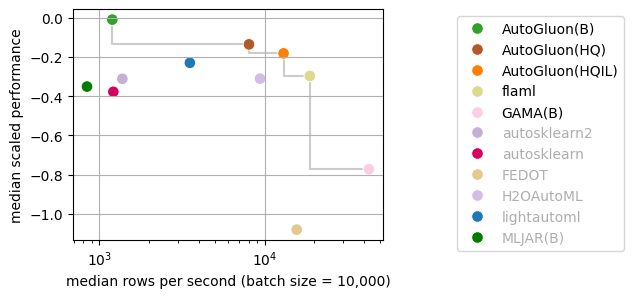

this frameworks ['AutoGluon(HQIL)_60min' 'AutoGluon(HQ)_60min' 'AutoGluon(B)_60min'
 'FEDOT_60min' 'GAMA(B)_60min' 'H2OAutoML_60min' 'NaiveAutoML_60min'
 'RF_60min' 'TPOT_60min' 'TRF_60min' 'autosklearn2_60min'
 'autosklearn_60min' 'CP_60min' 'flaml_60min' 'lightautoml_60min'
 'MLJAR(B)_60min']


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\2041578537.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


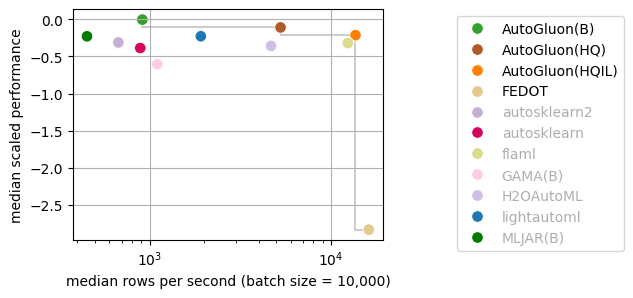

In [48]:
for name_time in strings_by_time:
    this_framework = results[results['framework'].str.contains(name_time) | results['framework'].isin(extra_frameworks)]
    # Map the name of the baselines
    print("this frameworks", this_framework.framework.unique())
    this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))
    exclude = ["CP_60min", "RF_60min", "TRF_60min"]
    data = this_framework
    # Assuming `data` is your DataFrame
    data = data[~data['framework'].str.contains("TPOT")]
    data = data[~data['framework'].str.contains("NaiveAutoML")]
    data = impute_missing_results(data, with_results_from="CP_60min")    
    data = data[["framework", "task", "constraint", "metric", "result", "infer_batch_size_file_10000"]].groupby(["framework", "task", "constraint", "metric"], as_index=False).mean()
    data = add_rescale(data, lower="RF_60min")    
    data = data[~data["framework"].isin(exclude)]
    data['framework'] = data['framework'].str.replace(name_time, '')
    data['framework'] = data['framework'].str.replace('_60min', '') # This is for the baselines _60min
    current_frameworks = data.framework.unique()
    common_elements = [element for element in list_order if element in current_frameworks]
    
    data["scaled"] = -data["scaled"]

    data = data.groupby(["framework", "constraint"])[["infer_batch_size_file_10000", "scaled"]].median()
    data["row_per_s"] = 10_000. / data["infer_batch_size_file_10000"]
    color_map = {k: v for k, v in FRAMEWORK_TO_COLOR.items() if k not in exclude}

    frameworks_to_keep_legend = []
    pareto_efficient = calculate_pareto(data["row_per_s"], data["scaled"])
    pareto_efficient_list = [x for x, y in pareto_efficient]
    pareto_not_efficient_list = []
    for framework in FRAMEWORK_TO_COLOR.keys():
        if framework in data.index.get_level_values('framework').unique():
            is_efficient = any(row_per_s_value in pareto_efficient_list for row_per_s_value in data.loc[framework, "row_per_s"])
            if is_efficient:
                frameworks_to_keep_legend.append(framework)
            else:
                pareto_not_efficient_list.append(framework)  # Grey color for inefficient methods

    # Create a dictionary to map frameworks to their corresponding row_per_s values
    framework_to_row_per_s = {framework: data.loc[framework, "row_per_s"].values[0] for framework in frameworks_to_keep_legend}
    
    # Sort frameworks_to_keep_legend based on the row_per_s values
    frameworks_to_keep_legend.sort(key=lambda framework: framework_to_row_per_s[framework])
    common_elements = frameworks_to_keep_legend + pareto_not_efficient_list# sorted

    fig, ax = plt.subplots(1, 1, figsize=(4, 3))
    ax = seaborn.scatterplot(
        data, 
        x="row_per_s", 
        y="scaled", 
        hue="framework",
        palette=color_map,
        s=70,  # marker size
        hue_order=common_elements,
        ax=ax,
    )
    plot_pareto(data, x="row_per_s", y="scaled", ax=ax)
    ax.set_xscale('log')
    ax.set_xlabel('median rows per second (batch size = 10,000)')
    ax.set_ylabel('median scaled performance')
    ax.grid(True)  # Add grid here
    handles, labels = ax.get_legend_handles_labels()
    legend = ax.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.8, 1))
    
    # Change the color of the first three labels to red
    for text in legend.get_texts()[len(frameworks_to_keep_legend):]:
        text.set_color('#aeaeae')
    
    with PdfPages(FIGURE_DIRECTORY / "inference" / f"performance_inference_{name_time}.pdf") as f:
        f.savefig(fig, bbox_inches="tight")

     # Define the file path for the PNG file
    file_path = FIGURE_DIRECTORY / "inference" / f"performance_inference_{name_time}.png"
    # Save the figure as a PNG file
    fig.savefig(file_path, bbox_inches="tight", dpi=1000)
    plt.show()
    plt.close(fig)


### The same but focused on the Pareto-efficient

this frameworks ['AutoGluon(HQIL)_5min' 'AutoGluon(HQ)_5min' 'AutoGluon(B)_5min'
 'FEDOT_5min' 'GAMA(B)_5min' 'H2OAutoML_5min' 'NaiveAutoML_5min'
 'RF_60min' 'TPOT_5min' 'TRF_60min' 'autosklearn2_5min' 'autosklearn_5min'
 'CP_60min' 'flaml_5min' 'lightautoml_5min' 'MLJAR(B)_5min']


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\2288464840.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


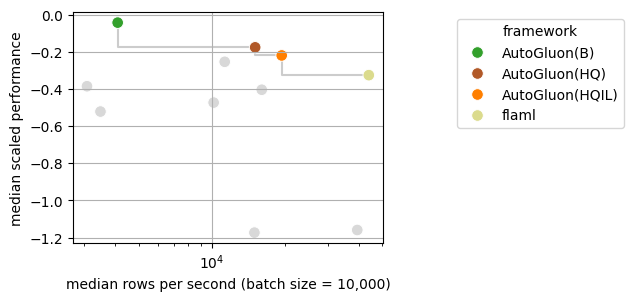

this frameworks ['AutoGluon(HQIL)_10min' 'AutoGluon(HQ)_10min' 'AutoGluon(B)_10min'
 'FEDOT_10min' 'GAMA(B)_10min' 'H2OAutoML_10min' 'NaiveAutoML_10min'
 'RF_60min' 'TPOT_10min' 'TRF_60min' 'autosklearn2_10min'
 'autosklearn_10min' 'CP_60min' 'flaml_10min' 'lightautoml_10min'
 'MLJAR(B)_10min']


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\2288464840.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


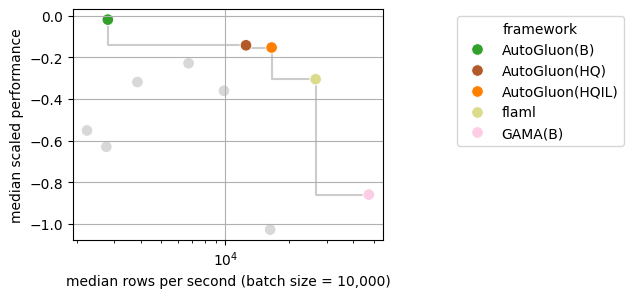

this frameworks ['AutoGluon(HQIL)_30min' 'AutoGluon(HQ)_30min' 'AutoGluon(B)_30min'
 'FEDOT_30min' 'GAMA(B)_30min' 'H2OAutoML_30min' 'NaiveAutoML_30min'
 'RF_60min' 'TPOT_30min' 'TRF_60min' 'autosklearn2_30min'
 'autosklearn_30min' 'CP_60min' 'flaml_30min' 'lightautoml_30min'
 'MLJAR(B)_30min']


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\2288464840.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


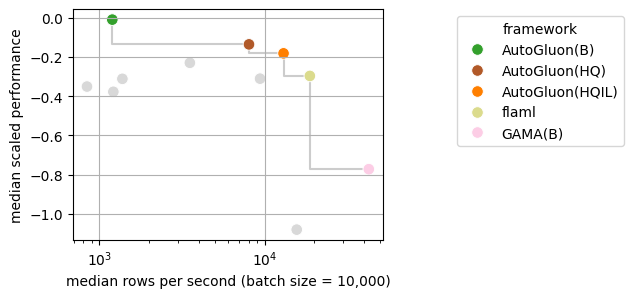

this frameworks ['AutoGluon(HQIL)_60min' 'AutoGluon(HQ)_60min' 'AutoGluon(B)_60min'
 'FEDOT_60min' 'GAMA(B)_60min' 'H2OAutoML_60min' 'NaiveAutoML_60min'
 'RF_60min' 'TPOT_60min' 'TRF_60min' 'autosklearn2_60min'
 'autosklearn_60min' 'CP_60min' 'flaml_60min' 'lightautoml_60min'
 'MLJAR(B)_60min']


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\2288464840.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


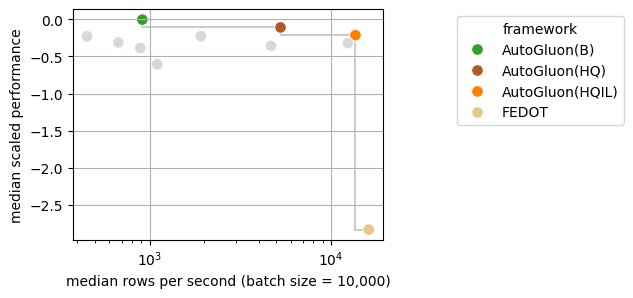

In [49]:
for name_time in strings_by_time:
    this_framework = results[results['framework'].str.contains(name_time) | results['framework'].isin(extra_frameworks)]
    # Map the name of the baselines
    print("this frameworks", this_framework.framework.unique())
    this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))
    exclude = ["CP_60min", "RF_60min", "TRF_60min"]
    data = this_framework
    # Assuming `data` is your DataFrame
    data = data[~data['framework'].str.contains("TPOT")]
    data = data[~data['framework'].str.contains("NaiveAutoML")]
    data = impute_missing_results(data, with_results_from="CP_60min")
    data = data[["framework", "task", "constraint", "metric", "result", "infer_batch_size_file_10000"]].groupby(["framework", "task", "constraint", "metric"], as_index=False).mean()
    data = add_rescale(data, lower="RF_60min")    
    data = data[~data["framework"].isin(exclude)]
    data['framework'] = data['framework'].str.replace(name_time, '')
    data['framework'] = data['framework'].str.replace('_60min', '') # This is for the baselines _60min

    current_frameworks = data.framework.unique()
    common_elements = [element for element in list_order if element in current_frameworks]
    data["scaled"] = -data["scaled"]
    data = data.groupby(["framework", "constraint"])[["infer_batch_size_file_10000", "scaled"]].median()

    data["row_per_s"] = 10_000. / data["infer_batch_size_file_10000"]
    color_map = {k: v for k, v in FRAMEWORK_TO_COLOR.items() if k not in exclude}

    # Calculate Pareto efficient methods
    pareto_efficient = calculate_pareto(data["row_per_s"], data["scaled"])
    pareto_efficient_list = [x for x, y in pareto_efficient]
    frameworks_to_keep_legend = []
    # Update color map
    color_map = {k: v for k, v in FRAMEWORK_TO_COLOR.items() if k not in exclude}
    for framework in FRAMEWORK_TO_COLOR.keys():
        if framework in data.index.get_level_values('framework').unique():
            is_efficient = any(row_per_s_value in pareto_efficient_list for row_per_s_value in data.loc[framework, "row_per_s"])
            if is_efficient:
                frameworks_to_keep_legend.append(framework)
            else:
                # color_map[framework] = "#cccccc"  # Grey color for inefficient methods
                color_map[framework] = (128/255, 128/255, 128/255, 0.3) # transparency 70%

    # Create a dictionary to map frameworks to their corresponding row_per_s values
    framework_to_row_per_s = {framework: data.loc[framework, "row_per_s"].values[0] for framework in frameworks_to_keep_legend}
    
    # Sort frameworks_to_keep_legend based on the row_per_s values
    frameworks_to_keep_legend.sort(key=lambda framework: framework_to_row_per_s[framework])

    fig, ax = plt.subplots(1, 1, figsize=(4, 3))
    ax = seaborn.scatterplot(
        data, 
        x="row_per_s", 
        y="scaled", 
        hue="framework",
        palette=color_map,
        s=70,  # marker size
        # hue_order=common_elements,
        hue_order=frameworks_to_keep_legend,
        ax=ax,
    )
    plot_pareto(data, x="row_per_s", y="scaled", ax=ax)
    ax.set_xscale('log')
    ax.set_xlabel('median rows per second (batch size = 10,000)')
    ax.set_ylabel('median scaled performance')
    ax.grid(True)  # Add grid here
    seaborn.move_legend(ax, "upper right", bbox_to_anchor=(1.8, 1))
    
    with PdfPages(FIGURE_DIRECTORY / "inference" / f"performance_inference_{name_time}_gray.pdf") as f:
        f.savefig(fig, bbox_inches="tight")

     # Define the file path for the PNG file
    file_path = FIGURE_DIRECTORY / "inference" / f"performance_inference_{name_time}_gray.png"
    # Save the figure as a PNG file
    fig.savefig(file_path, bbox_inches="tight", dpi=1000)
    
    plt.show()
    plt.close(fig)

### For fun, AutoGluon vs. the rest

In [50]:
list_to_use = list(results.framework.unique())
filtered_list = [item for item in list_to_use if 'AutoGluon(B)' in item or '60min' in item]
filtered_list = [item for item in filtered_list if 'AutoGluon(HQIL)' not in item and 'AutoGluon(HQ)' not in item]

print(filtered_list)

['AutoGluon(B)_10min', 'AutoGluon(B)_30min', 'AutoGluon(B)_5min', 'AutoGluon(B)_60min', 'FEDOT_60min', 'GAMA(B)_60min', 'H2OAutoML_60min', 'NaiveAutoML_60min', 'RF_60min', 'TPOT_60min', 'TRF_60min', 'autosklearn2_60min', 'autosklearn_60min', 'CP_60min', 'flaml_60min', 'lightautoml_60min', 'MLJAR(B)_60min']


['AutoGluon(B)_10min' 'AutoGluon(B)_30min' 'AutoGluon(B)_5min'
 'AutoGluon(B)_60min' 'FEDOT_60min' 'GAMA(B)_60min' 'H2OAutoML_60min'
 'NaiveAutoML_60min' 'RF_60min' 'TPOT_60min' 'TRF_60min'
 'autosklearn2_60min' 'autosklearn_60min' 'CP_60min' 'flaml_60min'
 'lightautoml_60min' 'MLJAR(B)_60min']


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\3120420619.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


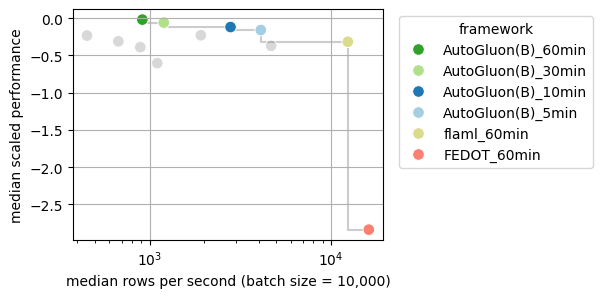

In [51]:
from matplotlib.ticker import MaxNLocator


this_framework = results[results['framework'].isin(filtered_list)]
print(this_framework.framework.unique())
this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))
exclude = ["CP_60min", "RF_60min", "TRF_60min"]
data = this_framework
data = impute_missing_results(data, with_results_from="CP_60min")
data = data[~data['framework'].str.contains("TPOT")]
data = data[~data['framework'].str.contains("NaiveAutoML")]
data = data[["framework", "task", "constraint", "metric", "result", "infer_batch_size_file_10000"]].groupby(["framework", "task", "constraint", "metric"], as_index=False).mean()
data = add_rescale(data, lower="RF_60min")    
data = data[~data["framework"].isin(exclude)]
current_frameworks = data.framework.unique()
list_order = list(FRAMEWORK_TO_COLOR.keys())
common_elements = [element for element in list_order if element in current_frameworks]
data["scaled"] = -data["scaled"]
data = data.groupby(["framework", "constraint"])[["infer_batch_size_file_10000", "scaled"]].median()

data["row_per_s"] = 10_000. / data["infer_batch_size_file_10000"]
color_map = {k: v for k, v in FRAMEWORK_TO_COLOR.items() if k not in exclude}

# Calculate Pareto efficient methods
pareto_efficient = calculate_pareto(data["row_per_s"], data["scaled"])
pareto_efficient_list = [x for x, y in pareto_efficient]
frameworks_to_keep_legend = []
# Update color map
color_map = {k: v for k, v in FRAMEWORK_TO_COLOR.items() if k not in exclude}
for framework in FRAMEWORK_TO_COLOR.keys():
    if framework in data.index.get_level_values('framework').unique():
        is_efficient = any(row_per_s_value in pareto_efficient_list for row_per_s_value in data.loc[framework, "row_per_s"])
        if is_efficient:
            frameworks_to_keep_legend.append(framework)
        else:
            # color_map[framework] = "#cccccc"  # Grey color for inefficient methods
            color_map[framework] = (128/255, 128/255, 128/255, 0.3) # transparency 70%

# Create a dictionary to map frameworks to their corresponding row_per_s values
framework_to_row_per_s = {framework: data.loc[framework, "row_per_s"].values[0] for framework in frameworks_to_keep_legend}

# Sort frameworks_to_keep_legend based on the row_per_s values
frameworks_to_keep_legend.sort(key=lambda framework: framework_to_row_per_s[framework])

            
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax = seaborn.scatterplot(
    data, 
    x="row_per_s", 
    y="scaled", 
    hue="framework",
    palette=color_map,
    s=70,  # marker size
    hue_order=frameworks_to_keep_legend,
    ax=ax,
)
plot_pareto(data, x="row_per_s", y="scaled", ax=ax)
ax.set_xscale('log')
ax.set_xlabel('median rows per second (batch size = 10,000)')
ax.set_ylabel('median scaled performance')
ax.grid(True)  # Add grid here
seaborn.move_legend(ax, "upper right", bbox_to_anchor=(1.7, 1))


with PdfPages(FIGURE_DIRECTORY / "inference_by_time" / "replicate.pdf") as f:
    f.savefig(fig, bbox_inches="tight")

# Define the file path for the PNG file
file_path = FIGURE_DIRECTORY / "inference_by_time" / "replicate.png"
# Save the figure as a PNG file
fig.savefig(file_path, bbox_inches="tight", dpi=1000)
plt.show()
plt.close(fig)


### All together

##### COLOR 

['AutoGluon(HQIL)_10min' 'AutoGluon(HQIL)_30min' 'AutoGluon(HQIL)_5min'
 'AutoGluon(HQIL)_60min' 'AutoGluon(HQ)_10min' 'AutoGluon(HQ)_30min'
 'AutoGluon(HQ)_5min' 'AutoGluon(HQ)_60min' 'AutoGluon(B)_10min'
 'AutoGluon(B)_30min' 'AutoGluon(B)_5min' 'AutoGluon(B)_60min'
 'FEDOT_10min' 'FEDOT_30min' 'FEDOT_5min' 'FEDOT_60min' 'GAMA(B)_10min'
 'GAMA(B)_30min' 'GAMA(B)_5min' 'GAMA(B)_60min' 'H2OAutoML_10min'
 'H2OAutoML_30min' 'H2OAutoML_5min' 'H2OAutoML_60min' 'NaiveAutoML_10min'
 'NaiveAutoML_30min' 'NaiveAutoML_5min' 'NaiveAutoML_60min' 'RF_60min'
 'TPOT_10min' 'TPOT_30min' 'TPOT_5min' 'TPOT_60min' 'TRF_60min'
 'autosklearn2_10min' 'autosklearn2_30min' 'autosklearn2_5min'
 'autosklearn2_60min' 'autosklearn_10min' 'autosklearn_30min'
 'autosklearn_5min' 'autosklearn_60min' 'CP_60min' 'flaml_10min'
 'flaml_30min' 'flaml_5min' 'flaml_60min' 'lightautoml_10min'
 'lightautoml_30min' 'lightautoml_5min' 'lightautoml_60min'
 'MLJAR(B)_10min' 'MLJAR(B)_30min' 'MLJAR(B)_5min' 'MLJAR(B)_60min']


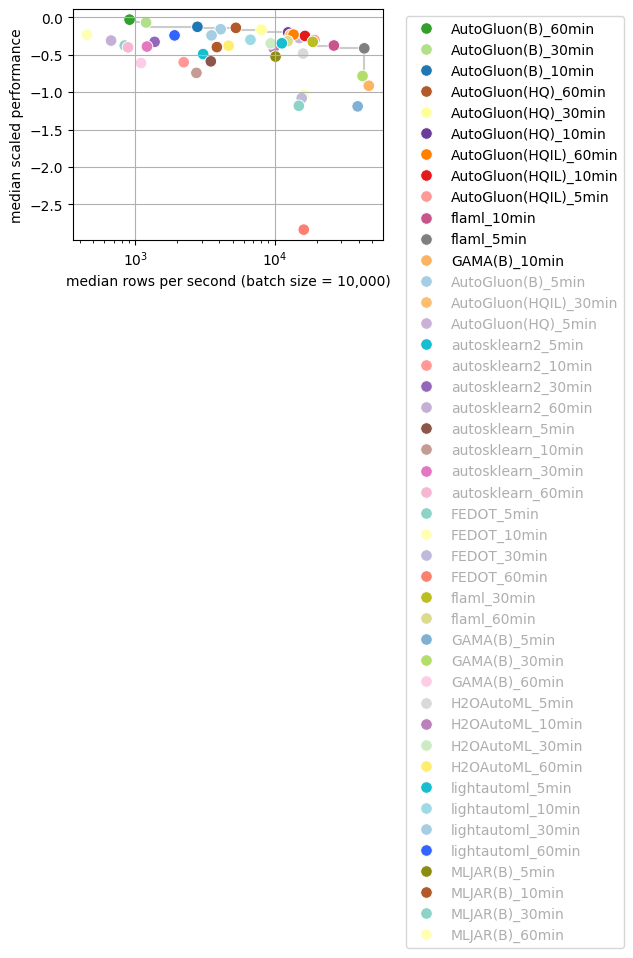

In [26]:
from matplotlib.ticker import MaxNLocator


this_framework = results
print(this_framework.framework.unique())
this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))
exclude = ["CP_60min", "RF_60min", "TRF_60min"]
data = this_framework
data = impute_missing_results(data, with_results_from="CP_60min")
data = data[~data['framework'].str.contains("TPOT")]
data = data[~data['framework'].str.contains("NaiveAutoML")]
data = data[["framework", "task", "constraint", "metric", "result", "infer_batch_size_file_10000"]].groupby(["framework", "task", "constraint", "metric"], as_index=False).mean()
data = add_rescale(data, lower="RF_60min")    
data = data[~data["framework"].isin(exclude)]

current_frameworks = data.framework.unique()
list_order = list(FRAMEWORK_TO_COLOR.keys())
common_elements = [element for element in list_order if element in current_frameworks]

data["scaled"] = -data["scaled"]
data = data.groupby(["framework", "constraint"])[["infer_batch_size_file_10000", "scaled"]].median()
data["row_per_s"] = 10_000. / data["infer_batch_size_file_10000"]
color_map = {k: v for k, v in FRAMEWORK_TO_COLOR.items() if k not in exclude}

frameworks_to_keep_legend = []
pareto_efficient = calculate_pareto(data["row_per_s"], data["scaled"])
pareto_efficient_list = [x for x, y in pareto_efficient]
pareto_not_efficient_list = []
for framework in FRAMEWORK_TO_COLOR.keys():
    if framework in data.index.get_level_values('framework').unique():
        is_efficient = any(row_per_s_value in pareto_efficient_list for row_per_s_value in data.loc[framework, "row_per_s"])
        if is_efficient:
            frameworks_to_keep_legend.append(framework)
        else:
            pareto_not_efficient_list.append(framework)  # Grey color for inefficient methods

# Create a dictionary to map frameworks to their corresponding row_per_s values
framework_to_row_per_s = {framework: data.loc[framework, "row_per_s"].values[0] for framework in frameworks_to_keep_legend}

# Sort frameworks_to_keep_legend based on the row_per_s values
frameworks_to_keep_legend.sort(key=lambda framework: framework_to_row_per_s[framework])
common_elements = frameworks_to_keep_legend + pareto_not_efficient_list# sorted

fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax = seaborn.scatterplot(
    data, 
    x="row_per_s", 
    y="scaled", 
    hue="framework",
    palette=color_map,
    s=70,  # marker size
    hue_order=common_elements,
    # hue_order = frameworks_to_keep_legend,
    ax=ax,
)
plot_pareto(data, x="row_per_s", y="scaled", ax=ax)
ax.set_xscale('log')
ax.set_xlabel('median rows per second (batch size = 10,000)')
ax.set_ylabel('median scaled performance')
ax.grid(True)  # Add grid here
handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.8, 1))

# Change the color of the first three labels to red
for text in legend.get_texts()[len(frameworks_to_keep_legend):]:
    text.set_color('#aeaeae')


with PdfPages(FIGURE_DIRECTORY / "inference_by_time" / "all_frameworks_color.pdf") as f:
    f.savefig(fig, bbox_inches="tight")

 # Define the file path for the PNG file
file_path = FIGURE_DIRECTORY / "inference_by_time" / "all_frameworks_color.png"
# Save the figure as a PNG file
fig.savefig(file_path, bbox_inches="tight", dpi=1000)

plt.show()
plt.close(fig)


##### The same but focused on the Pareto-efficient

['AutoGluon(HQIL)_10min' 'AutoGluon(HQIL)_30min' 'AutoGluon(HQIL)_5min'
 'AutoGluon(HQIL)_60min' 'AutoGluon(HQ)_10min' 'AutoGluon(HQ)_30min'
 'AutoGluon(HQ)_5min' 'AutoGluon(HQ)_60min' 'AutoGluon(B)_10min'
 'AutoGluon(B)_30min' 'AutoGluon(B)_5min' 'AutoGluon(B)_60min'
 'FEDOT_10min' 'FEDOT_30min' 'FEDOT_5min' 'FEDOT_60min' 'GAMA(B)_10min'
 'GAMA(B)_30min' 'GAMA(B)_5min' 'GAMA(B)_60min' 'H2OAutoML_10min'
 'H2OAutoML_30min' 'H2OAutoML_5min' 'H2OAutoML_60min' 'NaiveAutoML_10min'
 'NaiveAutoML_30min' 'NaiveAutoML_5min' 'NaiveAutoML_60min' 'RF_60min'
 'TPOT_10min' 'TPOT_30min' 'TPOT_5min' 'TPOT_60min' 'TRF_60min'
 'autosklearn2_10min' 'autosklearn2_30min' 'autosklearn2_5min'
 'autosklearn2_60min' 'autosklearn_10min' 'autosklearn_30min'
 'autosklearn_5min' 'autosklearn_60min' 'CP_60min' 'flaml_10min'
 'flaml_30min' 'flaml_5min' 'flaml_60min' 'lightautoml_10min'
 'lightautoml_30min' 'lightautoml_5min' 'lightautoml_60min'
 'MLJAR(B)_10min' 'MLJAR(B)_30min' 'MLJAR(B)_5min' 'MLJAR(B)_60min']


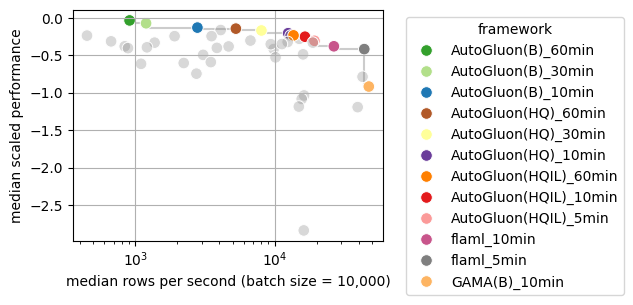

In [27]:
from matplotlib.ticker import MaxNLocator


this_framework = results
print(this_framework.framework.unique())
# Map the name of the baselines
this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))
exclude = ["CP_60min", "RF_60min", "TRF_60min"]
data = this_framework
data = impute_missing_results(data, with_results_from="CP_60min")
data = data[~data['framework'].str.contains("TPOT")]
data = data[~data['framework'].str.contains("NaiveAutoML")]
data = data[["framework", "task", "constraint", "metric", "result", "infer_batch_size_file_10000"]].groupby(["framework", "task", "constraint", "metric"], as_index=False).mean()
data = add_rescale(data, lower="RF_60min")    
data = data[~data["framework"].isin(exclude)]

current_frameworks = data.framework.unique()
list_order = list(FRAMEWORK_TO_COLOR.keys())
common_elements = [element for element in list_order if element in current_frameworks]
data["scaled"] = -data["scaled"]
data = data.groupby(["framework", "constraint"])[["infer_batch_size_file_10000", "scaled"]].median()
data["row_per_s"] = 10_000. / data["infer_batch_size_file_10000"]
color_map = {k: v for k, v in FRAMEWORK_TO_COLOR.items() if k not in exclude}

# Calculate Pareto efficient methods
pareto_efficient = calculate_pareto(data["row_per_s"], data["scaled"])
pareto_efficient_list = [x for x, y in pareto_efficient]
frameworks_to_keep_legend = []
# Update color map
color_map = {k: v for k, v in FRAMEWORK_TO_COLOR.items() if k not in exclude}
for framework in FRAMEWORK_TO_COLOR.keys():
    if framework in data.index.get_level_values('framework').unique():
        is_efficient = any(row_per_s_value in pareto_efficient_list for row_per_s_value in data.loc[framework, "row_per_s"])
        if is_efficient:
            frameworks_to_keep_legend.append(framework)
        else:
            # color_map[framework] = "#cccccc"  # Grey color for inefficient methods
            color_map[framework] = (128/255, 128/255, 128/255, 0.3)
            
# Create a dictionary to map frameworks to their corresponding row_per_s values
framework_to_row_per_s = {framework: data.loc[framework, "row_per_s"].values[0] for framework in frameworks_to_keep_legend}

# Sort frameworks_to_keep_legend based on the row_per_s values
frameworks_to_keep_legend.sort(key=lambda framework: framework_to_row_per_s[framework])
         

fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax = seaborn.scatterplot(
    data, 
    x="row_per_s", 
    y="scaled", 
    hue="framework",
    palette=color_map,
    s=70,  # marker size
    # hue_order=common_elements,
    hue_order = frameworks_to_keep_legend,
    ax=ax,
)
plot_pareto(data, x="row_per_s", y="scaled", ax=ax)
ax.set_xscale('log')
ax.set_xlabel('median rows per second (batch size = 10,000)')
ax.set_ylabel('median scaled performance')
ax.grid(True)  # Add grid here
seaborn.move_legend(ax, "upper right", bbox_to_anchor=(1.8, 1))


with PdfPages(FIGURE_DIRECTORY / "inference_by_time" / "all_frameworks.pdf") as f:
    f.savefig(fig, bbox_inches="tight")

 # Define the file path for the PNG file
file_path = FIGURE_DIRECTORY / "inference_by_time" / "all_frameworks.png"
# Save the figure as a PNG file
fig.savefig(file_path, bbox_inches="tight", dpi=1000)

plt.show()
plt.close(fig)


### Each framework divided by time

In [29]:
strings_in_frameworks_pareto = ['AutoGluon(B)', 'AutoGluon(HQ)', 'AutoGluon(HQIL)', 'flaml', 'lightautoml',
       'MLJAR(B)', 'GAMA(B)', 'H2OAutoML', 'FEDOT', 'autosklearn', 'autosklearn2', 'TPOT', 'NaiveAutoML']  # 'TPOT', 'NaiveAutoML'

# Tables - Ignore below (or toy around with it... I didn't update it)
Generating tables 4-9 of the appendix.

AutoGluon(B)
this frameworks ['AutoGluon(B)_10min' 'AutoGluon(B)_30min' 'AutoGluon(B)_5min'
 'AutoGluon(B)_60min' 'RF_60min' 'TRF_60min' 'CP_60min']


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\3111858356.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


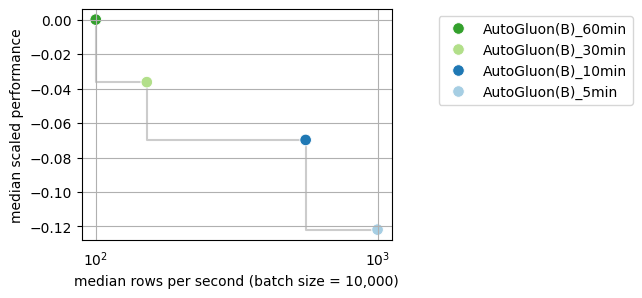

AutoGluon(HQ)
this frameworks ['AutoGluon(HQ)_10min' 'AutoGluon(HQ)_30min' 'AutoGluon(HQ)_5min'
 'AutoGluon(HQ)_60min' 'RF_60min' 'TRF_60min' 'CP_60min']


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\3111858356.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


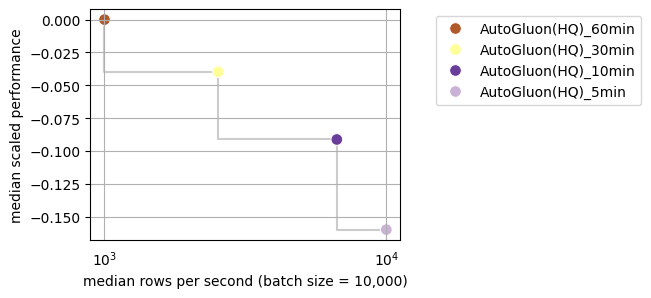

AutoGluon(HQIL)
this frameworks ['AutoGluon(HQIL)_10min' 'AutoGluon(HQIL)_30min' 'AutoGluon(HQIL)_5min'
 'AutoGluon(HQIL)_60min' 'RF_60min' 'TRF_60min' 'CP_60min']


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\3111858356.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


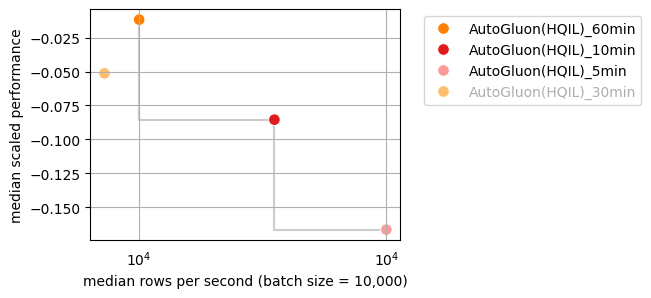

flaml
this frameworks ['RF_60min' 'TRF_60min' 'CP_60min' 'flaml_10min' 'flaml_30min'
 'flaml_5min' 'flaml_60min']


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\3111858356.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


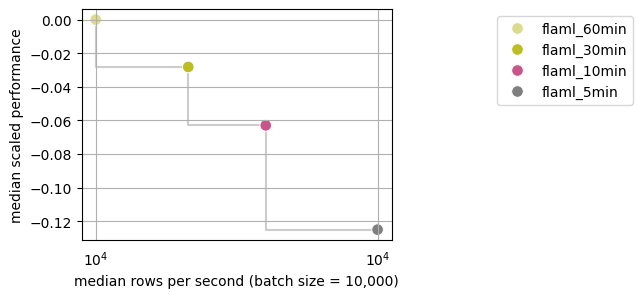

lightautoml
this frameworks ['RF_60min' 'TRF_60min' 'CP_60min' 'lightautoml_10min' 'lightautoml_30min'
 'lightautoml_5min' 'lightautoml_60min']


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\3111858356.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


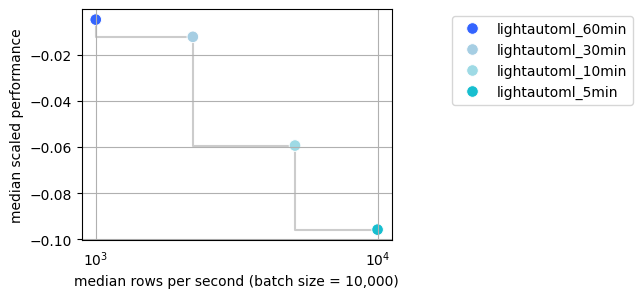

MLJAR(B)
this frameworks ['RF_60min' 'TRF_60min' 'CP_60min' 'MLJAR(B)_10min' 'MLJAR(B)_30min'
 'MLJAR(B)_5min' 'MLJAR(B)_60min']


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\3111858356.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


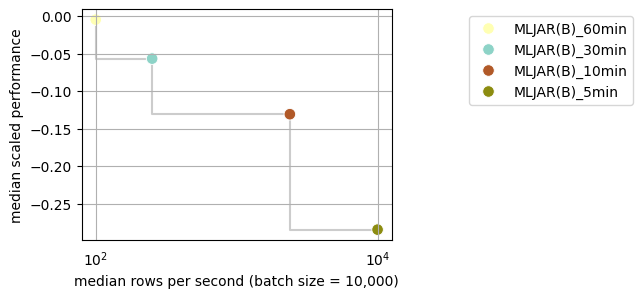

GAMA(B)
this frameworks ['GAMA(B)_10min' 'GAMA(B)_30min' 'GAMA(B)_5min' 'GAMA(B)_60min' 'RF_60min'
 'TRF_60min' 'CP_60min']


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\3111858356.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


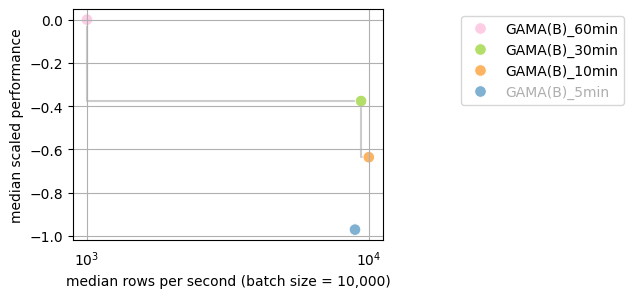

H2OAutoML
this frameworks ['H2OAutoML_10min' 'H2OAutoML_30min' 'H2OAutoML_5min' 'H2OAutoML_60min'
 'RF_60min' 'TRF_60min' 'CP_60min']


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\3111858356.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


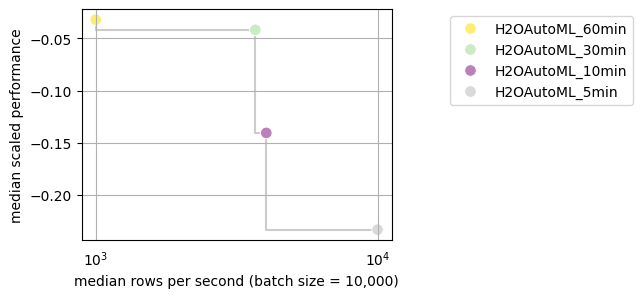

FEDOT
this frameworks ['FEDOT_10min' 'FEDOT_30min' 'FEDOT_5min' 'FEDOT_60min' 'RF_60min'
 'TRF_60min' 'CP_60min']


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\3111858356.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


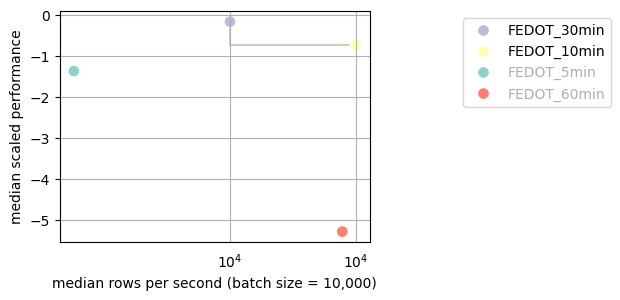

autosklearn
this frameworks ['RF_60min' 'TRF_60min' 'autosklearn_10min' 'autosklearn_30min'
 'autosklearn_5min' 'autosklearn_60min' 'CP_60min']


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\3111858356.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


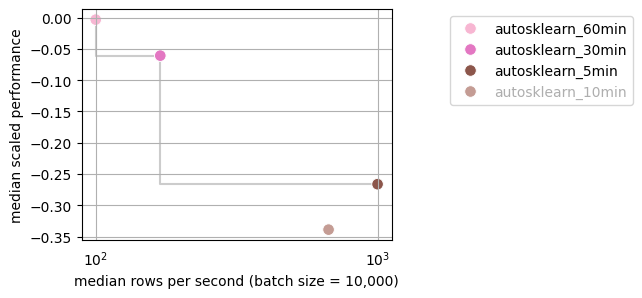

autosklearn2
this frameworks ['RF_60min' 'TRF_60min' 'autosklearn2_10min' 'autosklearn2_30min'
 'autosklearn2_5min' 'autosklearn2_60min' 'CP_60min']


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\3111858356.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


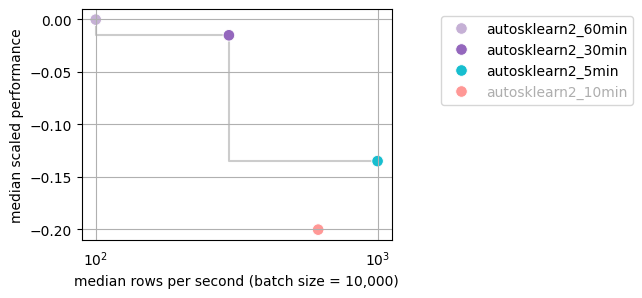

TPOT
this frameworks ['RF_60min' 'TPOT_10min' 'TPOT_30min' 'TPOT_5min' 'TPOT_60min' 'TRF_60min'
 'CP_60min']


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\3111858356.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


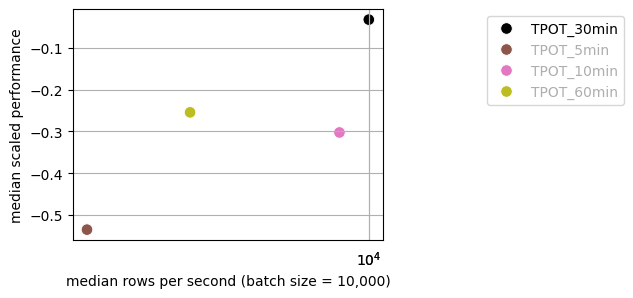

NaiveAutoML
this frameworks ['NaiveAutoML_10min' 'NaiveAutoML_30min' 'NaiveAutoML_5min'
 'NaiveAutoML_60min' 'RF_60min' 'TRF_60min' 'CP_60min']


C:\Users\20210595\AppData\Local\Temp\ipykernel_2052\3111858356.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


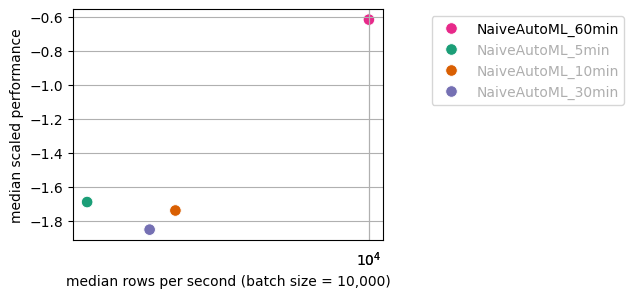

In [30]:
for name_fr in strings_in_frameworks_pareto:
    print(name_fr)
    this_framework = results[results['framework'].isin([f'{name_fr}_5min', f'{name_fr}_10min', f'{name_fr}_30min', f'{name_fr}_60min', 'RF_60min', 'TRF_60min', 'CP_60min'])]
    # Map the name of the baselines
    print("this frameworks", this_framework.framework.unique())
    this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))
    exclude = ["CP_60min", "RF_60min", "TRF_60min"]
    data = this_framework
    data = impute_missing_results(data, with_results_from="CP_60min")
    data = data[["framework", "task", "constraint", "metric", "result", "infer_batch_size_file_10000"]].groupby(["framework", "task", "constraint", "metric"], as_index=False).mean()
    data = add_rescale(data, lower="RF_60min")    
    data = data[~data["framework"].isin(exclude)]
    current_frameworks = data.framework.unique()
    common_elements = [element for element in list_order if element in current_frameworks]
    
    data["scaled"] = -data["scaled"]
    data = data.groupby(["framework", "constraint"])[["infer_batch_size_file_10000", "scaled"]].median()

    data["row_per_s"] = 10_000. / data["infer_batch_size_file_10000"]
    color_map = {k: v for k, v in FRAMEWORK_TO_COLOR.items() if k not in exclude}

    frameworks_to_keep_legend = []
    pareto_efficient = calculate_pareto(data["row_per_s"], data["scaled"])
    pareto_efficient_list = [x for x, y in pareto_efficient]
    pareto_not_efficient_list = []
    for framework in FRAMEWORK_TO_COLOR.keys():
        if framework in data.index.get_level_values('framework').unique():
            is_efficient = any(row_per_s_value in pareto_efficient_list for row_per_s_value in data.loc[framework, "row_per_s"])
            if is_efficient:
                frameworks_to_keep_legend.append(framework)
            else:
                pareto_not_efficient_list.append(framework)  # Grey color for inefficient methods

    # Create a dictionary to map frameworks to their corresponding row_per_s values
    framework_to_row_per_s = {framework: data.loc[framework, "row_per_s"].values[0] for framework in frameworks_to_keep_legend}
    
    # Sort frameworks_to_keep_legend based on the row_per_s values
    frameworks_to_keep_legend.sort(key=lambda framework: framework_to_row_per_s[framework])
    common_elements = frameworks_to_keep_legend + pareto_not_efficient_list# sorted
    
    fig, ax = plt.subplots(1, 1, figsize=(4, 3))
    ax = seaborn.scatterplot(
        data, 
        x="row_per_s", 
        y="scaled", 
        hue="framework",
        palette=color_map,
        s=70,  # marker size
        hue_order=common_elements,
        # hue_order=frameworks_to_keep_legend,
        ax=ax,
    )
    plot_pareto(data, x="row_per_s", y="scaled", ax=ax)
    # Important:
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax.set_xscale('log')
    ax.set_xlabel('median rows per second (batch size = 10,000)')
    ax.set_ylabel('median scaled performance')
    ax.grid(True)  # Add grid here

    pareto_efficient_list = sorted([x for x, y in pareto_efficient])
    first_last_pareto = [pareto_efficient_list[0], pareto_efficient_list[-1]]
    selected_ticks = first_last_pareto
    selected_labels = first_last_pareto
    selected_labels = [f"$10^{{{int(np.log10(tick))}}}$" for tick in selected_ticks]
    
    # Set the selected x-ticks and labels
    ax.set_xticks(selected_ticks)
    ax.set_xticklabels(selected_labels)
    
    # Ensure the tick parameters are set correctly
    ax.tick_params(axis='x', which='major', bottom=False, top=False, labelbottom=True)

    
    handles, labels = ax.get_legend_handles_labels()
    legend = ax.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.8, 1))
    
    # Change the color of the first three labels to red
    for text in legend.get_texts()[len(frameworks_to_keep_legend):]:
        text.set_color('#aeaeae')
    
    with PdfPages(FIGURE_DIRECTORY / "inference" / f"performance_inference_{name_fr}_the_four_times.pdf") as f:
        f.savefig(fig, bbox_inches="tight")

    # Define the file path for the PNG file
    file_path = FIGURE_DIRECTORY / "inference" / f"performance_inference_{name_fr}_the_four_times.png"
    # Save the figure as a PNG file
    fig.savefig(file_path, bbox_inches="tight", dpi=1000)
    plt.show()
    plt.close(fig)
